##### Importing *`Global Libraries`*

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Loading *`battlestats`* and *`dex`* datasets from *`json`* format and arranging them in a `pandas dataframe`

In [22]:
# Loading the dataset
with open('./datasets/battlestats.json') as f:
    battlestats = json.load(f)

with open('./datasets/dex.json') as f:
    dex = json.load(f)

# Creating DataFrame and extracting data from json
data = battlestats['data']
df = pd.DataFrame()

for i in data:
    abilities = []
    for j in data[i]['Abilities']:
        abilities.append({j: data[i]['Abilities'][j]})
    abilities = [abilities]

    abilities = pd.DataFrame([abilities], columns=['Abilities'], index=[i])
    abilities['Pokemon'] = i
    abilities['Usage'] = data[i]['usage']
    abilities['RowCount'] = data[i]['Raw count']
    Happiness = []
    for j in data[i]['Happiness']:
        Happiness.append({j: data[i]['Happiness'][j]})

    Happiness = [Happiness]
    abilities['Happiness'] = Happiness
    for k in range(0, 4):
        abilities[f'Viability Ceiling {k}'] = data[i]['Viability Ceiling'][k]

    Teammates = []
    for j in data[i]['Teammates']:
        Teammates.append({j: data[i]['Teammates'][j]})
    Teammates = [Teammates]
    abilities['Teammates'] = Teammates
    name = i.lower()
    # if name contain any non alphanumeric character replace it with ''
    name = ''.join(e for e in name if e.isalpha())
    Types = []
    for j in dex[name]['types']:
        Types.append(j)
    Types = [Types]
    abilities['Types'] = Types
    abilities['hp'] = dex[name]['baseStats']['hp']
    abilities['atk'] = dex[name]['baseStats']['atk']
    abilities['def'] = dex[name]['baseStats']['def']
    abilities['spa'] = dex[name]['baseStats']['spa']
    abilities['spd'] = dex[name]['baseStats']['spd']
    abilities['spe'] = dex[name]['baseStats']['spe']
    abilities['bst'] = dex[name]['baseStats']['hp'] + dex[name]['baseStats']['atk'] + dex[name]['baseStats']['def'] + dex[name]['baseStats']['spa'] + dex[name]['baseStats']['spd'] + dex[name]['baseStats']['spe']
    abilities['weight'] = dex[name]['weightkg']
    abilities['height'] = dex[name]['heightm']
    abilities['color'] = dex[name]['color']
    try:
        gen = dex[name]['genderRatio']['M']
        if gen >= 0.5:
            gen = 'M'
        else:
            gen = 'F'
        abilities['Gender'] = gen
    except:
        abilities['Gender'] = 'N'
    # another try
    try:
        abilities['Gender'] = dex[name]['gender']
    except:
        pass

    df = pd.concat([df, abilities], ignore_index=True)



df.head(10)

# save as csv
# df.to_csv('./datasets/Generated_pokemon.csv', index=False)

,Abilities,Pokemon,Usage,RowCount,Happiness,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,Teammates,...,atk,def,spa,spd,spe,bst,weight,height,color,Gender
0,"[{'healer': 53.0}, {'magicbounce': 2276.0}]",Hattrem,0.000756,2329,[{'255': 2329.0}],59,74,74,58,"[{'Fletchinder': 6.0}, {'Iron Valiant': 115.0}...",...,40,65,86,73,49,370,4.8,0.6,Pink,F
1,[{'quarkdrive': 34661.0}],Iron Leaves,0.011033,34661,[{'255': 34661.0}],1178,86,76,60,"[{'Wugtrio': 6.0}, {'Iron Valiant': 5985.0}, {...",...,130,88,70,108,104,590,125.0,1.5,Green,N
2,[{'cursedbody': 60945.0}],Gengar,0.019336,60945,[{'255': 60945.0}],1727,83,73,55,"[{'Magnemite': 16.0}, {'Iron Leaves': 165.0}, ...",...,65,60,130,75,110,500,40.5,1.5,Purple,N
3,[{'quarkdrive': 574225.0}],Iron Valiant,0.184939,574225,[{'255': 574225.0}],14136,90,78,62,"[{'Iron Leaves': 5985.0}, {'Blissey': 2778.0},...",...,130,90,120,60,116,590,35.0,1.4,White,N
4,"[{'flamebody': 398707.0}, {'swarm': 18904.0}]",Volcarona,0.134519,417611,[{'255': 417611.0}],10309,87,79,62,"[{'Iron Leaves': 2146.0}, {'Blissey': 1761.0},...",...,60,65,135,105,100,550,46.0,1.6,White,N
5,"[{'anticipation': 340.0}, {'dryskin': 4660.0},...",Toxicroak,0.001995,6513,"[{'0': 4.0}, {'255': 6509.0}]",225,76,67,51,"[{'Iron Leaves': 20.0}, {'Wugtrio': 19.0}, {'I...",...,106,65,86,65,85,490,44.4,1.3,Blue,N
6,"[{'pressure': 1858.0}, {'infiltrator': 4170.0}]",Spiritomb,0.001884,6028,[{'255': 6028.0}],203,71,68,53,"[{'Iron Leaves': 8.0}, {'Blissey': 44.0}, {'Wu...",...,92,108,92,108,35,485,108.0,1.0,Purple,N
7,[{'myceliummight': 338.0}],Toedscool,0.000103,338,[{'255': 338.0}],26,73,73,55,"[{'Fletchinder': 2.0}, {'Bronzong': 4.0}, {'Vo...",...,40,35,50,100,70,335,33.0,0.9,Yellow,N
8,"[{'anticipation': 122.0}, {'runaway': 28.0}, {...",Eevee,0.000119,400,[{'255': 400.0}],17,44,44,44,"[{'Iron Valiant': 10.0}, {'Volcarona': 26.0}, ...",...,55,50,45,65,55,325,6.5,0.3,Brown,M
9,"[{'purifyingsalt': 2396.0}, {'clearbody': 46.0...",Naclstack,0.000752,2487,[{'255': 2487.0}],109,71,68,54,"[{'Hattrem': 12.0}, {'Iron Leaves': 8.0}, {'Fl...",...,60,100,35,65,35,355,105.0,0.5,Brown,N


`Pokemon` Images

In [21]:
pok_images = os.listdir('./pokemon_images')

non_images = []
for i in df['Pokemon']:
    str = i.lower() + '.png'
    if str not in pok_images:
        non_images.append(i)

print(len(non_images))
print(non_images)

32
['Hattrem', 'Iron Leaves', 'Iron Valiant', 'Pincurchin', 'Scream Tail', 'Tauros-Paldea-Aqua', 'Frosmoth', 'Ting-Lu', 'Falinks', 'Wo-Chien', 'Iron Jugulis', 'Iron Treads', 'Zoroark-Hisui', 'Walking Wake', 'Iron Thorns', 'Chien-Pao', "Oricorio-Pa'u", 'Polteageist', 'Grimmsnarl', 'Tauros-Paldea-Blaze', 'Brute Bonnet', 'Iron Hands', 'Hatenna', 'Sandy Shocks', 'Perrserker', 'Roaring Moon', 'Oricorio-Pom-Pom', 'Hatterene', 'Tauros-Paldea-Combat', 'Great Tusk', 'Slither Wing', 'Iron Moth']


#### Performing *`EDAs`* on the dataset to get a better understanding of the data

##### *`Null Check`* on the dataset

In [ ]:
# check for duplicate pokemon
df[df.duplicated(subset=['Pokemon'])]

In [ ]:
# check for null values in the dataset
print('Null Values in the dataframe-', df.isnull().sum())

# check for NaN values in the dataframe
print('NaN Values in the dataframe-', df.isna().sum())

##### *`DataFrame`* Information

In [ ]:
print('Columns in the dataframe-', df.columns)

print(df.describe())

##### *`Correlation`* between the features

In [ ]:
# heatmap of the dataframe to show distribution of correlation between the features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the features')
plt.show()

##### *`Countplot of Pokemon Types`*

In [ ]:
# countplot of the pokemon types
AllTypes = []
for i in df['Types']:
    for j in i:
        if j not in AllTypes:
            AllTypes.append(j)

AllTypes = pd.DataFrame(AllTypes, columns=['Types'])
AllTypes['Count'] = 0
for i in AllTypes['Types']:
    for j in df['Types']:
        if i in j:
            AllTypes.loc[AllTypes['Types'] == i, 'Count'] += 1

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Count', data=AllTypes, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Count of Pokemon Types')
plt.show()

##### *`Most Used Pokemon Types`*

In [ ]:
# Best pokemons in each type
BestPokemon = []
for i in AllTypes['Types']:
    BestPokemon.append(df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].idxmax())

BestPokemon = pd.DataFrame(BestPokemon, columns=['BestPokemon'])
BestPokemon['Types'] = AllTypes['Types']
BestPokemon['Usage'] = 0
for i in BestPokemon['Types']:
    BestPokemon.loc[BestPokemon['Types'] == i, 'Usage'] = df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].max()

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Usage', data=BestPokemon, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Best Pokemon in each type')
plt.show()

##### *`Best Pokemon`* in each type for *`Attack`*, *`Defense`*, *`Sp. Atk`*, *`Sp. Def`*, *`Speed`* and *`Hp`*

In [ ]:
# Attack
BestAttack = []
for i in AllTypes['Types']:
    BestAttack.append(df.loc[df['Types'].apply(lambda x: i in x), 'atk'].idxmax())

BestAttack = pd.DataFrame(BestAttack, columns=['BestAttack'])
BestAttack['Types'] = AllTypes['Types']
BestAttack['atk'] = 0
for i in BestAttack['Types']:
    BestAttack.loc[BestAttack['Types'] == i, 'atk'] = df.loc[df['Types'].apply(lambda x: i in x), 'atk'].max()

# Defense
BestDefense = []
for i in AllTypes['Types']:
    BestDefense.append(df.loc[df['Types'].apply(lambda x: i in x), 'def'].idxmax())

BestDefense = pd.DataFrame(BestDefense, columns=['BestDefense'])
BestDefense['Types'] = AllTypes['Types']
BestDefense['def'] = 0
for i in BestDefense['Types']:
    BestDefense.loc[BestDefense['Types'] == i, 'def'] = df.loc[df['Types'].apply(lambda x: i in x), 'def'].max()

# Speed
BestSpeed = []
for i in AllTypes['Types']:
    BestSpeed.append(df.loc[df['Types'].apply(lambda x: i in x), 'spe'].idxmax())

BestSpeed = pd.DataFrame(BestSpeed, columns=['BestSpeed'])
BestSpeed['Types'] = AllTypes['Types']

BestSpeed['spe'] = 0
for i in BestSpeed['Types']:
    BestSpeed.loc[BestSpeed['Types'] == i, 'spe'] = df.loc[df['Types'].apply(lambda x: i in x), 'spe'].max()

# Special Attack
BestSpAtk = []
for i in AllTypes['Types']:
    BestSpAtk.append(df.loc[df['Types'].apply(lambda x: i in x), 'spa'].idxmax())

BestSpAtk = pd.DataFrame(BestSpAtk, columns=['BestSpAtk'])
BestSpAtk['Types'] = AllTypes['Types']
BestSpAtk['spa'] = 0
for i in BestSpAtk['Types']:
    BestSpAtk.loc[BestSpAtk['Types'] == i, 'spa'] = df.loc[df['Types'].apply(lambda x: i in x), 'spa'].max()

# Special Defense
BestSpDef = []
for i in AllTypes['Types']:
    BestSpDef.append(df.loc[df['Types'].apply(lambda x: i in x), 'spd'].idxmax())

BestSpDef = pd.DataFrame(BestSpDef, columns=['BestSpDef'])
BestSpDef['Types'] = AllTypes['Types']
BestSpDef['spd'] = 0
for i in BestSpDef['Types']:
    BestSpDef.loc[BestSpDef['Types'] == i, 'spd'] = df.loc[df['Types'].apply(lambda x: i in x), 'spd'].max()

# HP
BestHP = []
for i in AllTypes['Types']:
    BestHP.append(df.loc[df['Types'].apply(lambda x: i in x), 'hp'].idxmax())

BestHP = pd.DataFrame(BestHP, columns=['BestHP'])
BestHP['Types'] = AllTypes['Types']
BestHP['hp'] = 0
for i in BestHP['Types']:
    BestHP.loc[BestHP['Types'] == i, 'hp'] = df.loc[df['Types'].apply(lambda x: i in x), 'hp'].max()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=BestAttack['Types'],
    y=BestAttack['atk'],
    name='Attack',
    marker_color='red',
    text=df.loc[BestAttack['BestAttack'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestDefense['Types'],
    y=BestDefense['def'],
    name='Defense',
    marker_color='blue',
    text=df.loc[BestDefense['BestDefense'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpeed['Types'],
    y=BestSpeed['spe'],
    name='Speed',
    marker_color='green',
    text=df.loc[BestSpeed['BestSpeed'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpAtk['Types'],
    y=BestSpAtk['spa'],
    name='Special Attack',
    marker_color='yellow',
    text=df.loc[BestSpAtk['BestSpAtk'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpDef['Types'],
    y=BestSpDef['spd'],
    name='Special Defense',
    marker_color='purple',
    text=df.loc[BestSpDef['BestSpDef'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestHP['Types'],
    y=BestHP['hp'],
    name='HP',
    marker_color='orange',
    text=df.loc[BestHP['BestHP'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.update_layout(
    title='Best Stats in Each Type',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Stat',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()

##### *`Distribution of Pokemon weights and heights`*

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df['weight'], ax=ax[0])
sns.distplot(df['height'], ax=ax[1])
ax[0].set_title('Distribution of Pokemon Weights')
ax[1].set_title('Distribution of Pokemon Heights')
plt.show()

#### Changing the dataset to do `Regression` on the dataset

In [23]:
with open('./datasets/viability.json') as f:
    viability = json.load(f)

dic = {}
pokemon_viability = []
for i in viability:
    for j in viability[i]:
        pokemon_viability.append(j)
        dic[j] = i



df = df.drop(['Abilities', 'Usage', 'Happiness', 'Teammates', 'Types', 'color', 'Gender'], axis=1)
# extract those records only from the original dataset whose pokemon name is in the pokemon_viability list
extracted_df = df.loc[df['Pokemon'].isin(pokemon_viability)]
# extracted_df = extracted_df.drop(['Pokemon'], axis=1)

# add a new column to the extracted_df dataframe called viability_rank according to the viability dictionary
extracted_df['viability_rank'] = extracted_df['Pokemon'].map(dic)

extracted_df['viability_rank']
extracted_df = extracted_df.drop(['Pokemon'], axis=1)
df = extracted_df

rating_map = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}
df['viability_rank'] = df['viability_rank'].map(rating_map)
df

/tmp/ipykernel_10282/2895522329.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['viability_rank'] = extracted_df['Pokemon'].map(dic)


,RowCount,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,hp,atk,def,spa,spd,spe,bst,weight,height,viability_rank
1,34661,1178,86,76,60,90,130,88,70,108,104,590,125.0,1.5,0.20
3,574225,14136,90,78,62,74,130,90,120,60,116,590,35.0,1.4,0.85
4,417611,10309,87,79,62,85,60,65,135,105,100,550,46.0,1.6,0.95
10,42560,1296,81,75,59,61,123,60,60,50,136,490,30.0,1.3,0.10
11,51524,1536,83,69,55,55,90,80,50,105,96,476,0.7,0.2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,297313,8096,86,76,59,75,125,80,60,100,85,525,62.0,1.6,0.55
249,112745,3116,87,80,61,92,105,90,125,90,98,600,160.0,1.8,0.65
252,55985,1543,83,73,58,68,125,65,65,115,80,518,52.0,1.6,0.10
253,289702,7441,87,78,61,80,70,60,140,110,110,570,36.0,1.2,0.65


##### `Dividing` the dataset into `train` and `test` sets

In [24]:
# divide the data into two groups test and train
train, test = train_test_split(df, test_size=0.2, random_state=42)

train_y = train['viability_rank']
train_x = train.drop(['viability_rank'], axis=1)
test_y = test['viability_rank']
test_x = test.drop(['viability_rank'], axis=1)

#### `Linear Regression`

In [5]:
LR = LinearRegression()
LR.fit(train_x, train_y)
pred_lr = LR.predict(test_x)

# show the score and the mean squared error
print('Test Score: ', LR.score(test_x, test_y))
print('Train Score: ', LR.score(train_x, train_y))
print('Mean squared error: %.2f' % mean_squared_error(test_y, pred_lr))

Test Score:  0.7160229104586646
Train Score:  0.8562465459312325
Mean squared error: 0.02


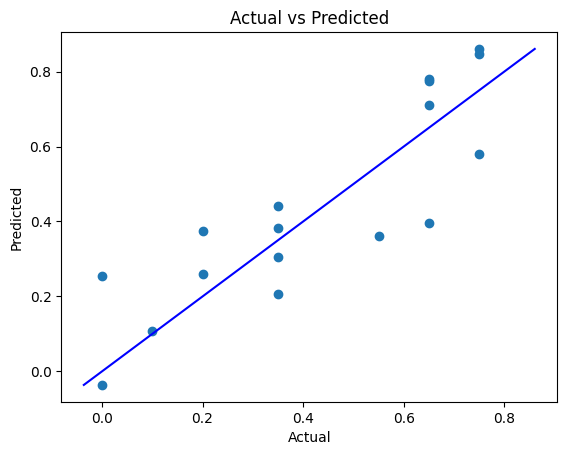

In [6]:
plt.scatter(test_y, pred_lr)

p1 = max(max(pred_lr), max(test_y))
p2 = min(min(pred_lr), min(test_y))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')
plt.show()

#### `Neural Network`

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score as R2_score

model = MLPRegressor(hidden_layer_sizes=(128, 8), activation='relu', solver='adam', max_iter=200)
model.fit(train_x, train_y)

print('Test Score: ', R2_score(test_y, model.predict(test_x)))
print('Train Score: ', model.score(train_x, train_y))
print('Mean squared error: %.2f' % mean_squared_error(test_y, model.predict(test_x)))

Test Score:  -1022633881.0864993
Train Score:  -826407877.905217
Mean squared error: 67691993.65


`random forest regressor`

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(train_x, train_y)

print('Test Score of Random Forest: ', R2_score(test_y, model.predict(test_x)))
print('Train Score of Random Forest: ', model.score(train_x, train_y))


#XGBoost
from xgboost import XGBRegressor as XGBoost

model = XGBoost(n_estimators=100, max_depth=10, random_state=42, learning_rate=0.1)
model.fit(train_x, train_y)

print('Test Score of XGBoost: ', R2_score(test_y, model.predict(test_x)))
print('Train Score of XGBoost: ', model.score(train_x, train_y))



Test Score of Random Forest:  0.8519269341348664
Train Score of Random Forest:  0.9690955240369196
Test Score of XGBoost:  0.8479440357385284
Train Score of XGBoost:  0.9999971603552958


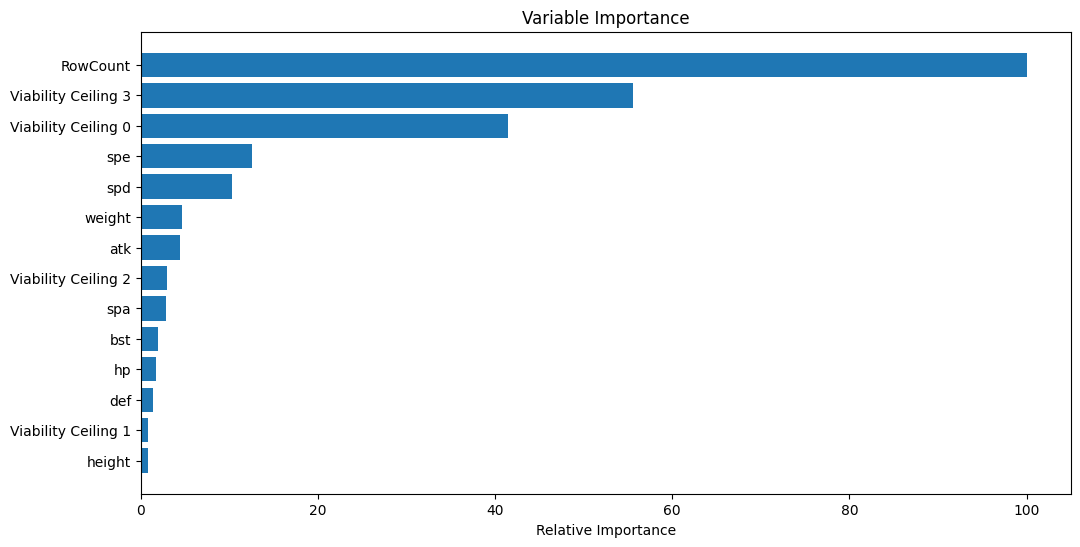

In [17]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()



#### Loading `Image` dataset

In [27]:
display(winners := pd.read_csv('datasets/clean/winners.tsv', header=None, index_col=None, sep='\t').values)
labels = winners[:, -1]
entries = winners[:, :-1]
train_X, test_X, train_y, test_y = train_test_split(entries, labels, test_size=0.3)

array([[7.500e+01, 1.100e+02, 1.050e+02, ..., 1.063e+03, 1.000e+03,
        1.000e+00],
       [8.500e+01, 6.000e+01, 1.000e+02, ..., 1.591e+03, 1.537e+03,
        0.000e+00],
       [3.500e+01, 5.500e+01, 4.000e+01, ..., 1.569e+03, 1.680e+03,
        0.000e+00],
       ...,
       [7.400e+01, 7.500e+01, 7.000e+01, ..., 1.000e+03, 1.000e+03,
        0.000e+00],
       [2.000e+01, 1.000e+01, 5.500e+01, ..., 1.000e+03, 1.000e+03,
        0.000e+00],
       [6.800e+01, 6.400e+01, 6.000e+01, ..., 1.000e+03, 1.000e+03,
        1.000e+00]])

#### `Laso` Regression

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = Lasso(alpha=0.01).fit(train_X, train_y)
display(lr.score(test_X, test_y))
display(lr.score(train_X, train_y))

testx, testy = list(zip(*sorted(list(zip(test_X, test_y)), key=lambda x: x[1])))
predy = lr.predict(testx)

/home/anuj/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+01, tolerance: 9.855e-02
  model = cd_fast.enet_coordinate_descent(


-0.0018677448300714605

0.046455434206503

#### `Decision Tree Regressor`

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

regressor = DecisionTreeClassifier()
regressor.fit(train_X, train_y.astype(int))
regressor.score(test_X, test_y.astype(int))


0.5227675931401538

precision: 0.5090470446320868
recall: 0.4988179669030733
f1: 0.5038805970149254
accuracy: 0.5085748078060319


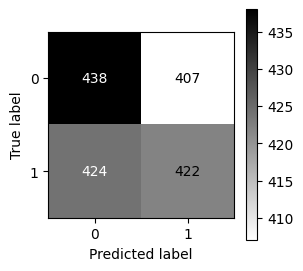

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

predy = regressor.predict(test_X)
plt.rcParams['figure.figsize'] = [3, 3]

testy = [int(x) for x in testy]
disp = ConfusionMatrixDisplay(confusion_matrix(testy, predy))
disp.plot(cmap='binary')
print(f'precision: {precision_score(testy, predy)}')
print(f'recall: {recall_score(testy, predy)}')
print(f'f1: {f1_score(testy, predy)}')
print(f'accuracy: {accuracy_score(testy, predy)}')



#### `EDA on Image dataset`

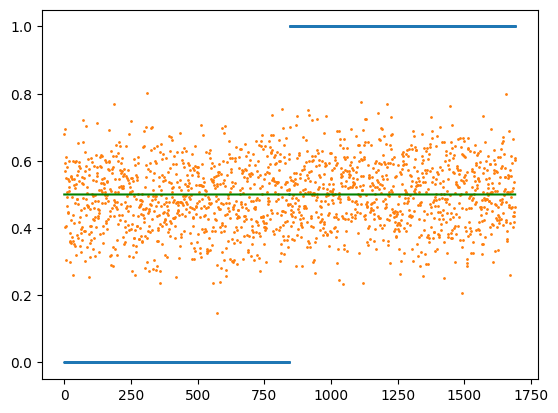

In [29]:
from matplotlib import pyplot as plt

plt.scatter(range(len(testy)), testy, s=1)
plt.scatter(range(len(testy)), predy, s=1)
plt.plot(range(len(testy)), [0.5]*len(testy), c='g')


In [ ]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(train_X)


In [ ]:
plt.scatter(
  embedding[:, 0],
  embedding[:, 1],
  c=[['r', 'b'][int(x)] for x in train_y],
  s=1)
plt.gca().set_aspect('equal', 'datalim')


In [ ]:
import sklearn

embedding = sklearn.decomposition.PCA(n_components=2).fit_transform(train_X)


In [ ]:
plt.scatter(
  embedding[:, 0],
  embedding[:, 1],
  c=[['r', 'b'][int(x)] for x in train_y],
  s=1)
plt.gca().set_aspect('equal', 'datalim')

#### `CNN` on Image dataset

In [35]:
import json

import numpy as np

ti, tl, tei, tel = [], [], [], []
for SLICESIZE in [5, 10, 15, 20]:
	with open(f'datasets/clean/slices_{SLICESIZE}.json') as fl:
		_data = json.load(fl)

	train_images, train_labels = list(zip(
		*[(np.array(img), label) for img, label in
			zip(_data['train_X'], _data['train_y'])
			if np.array(img).shape == np.array(_data['train_X'][0]).shape]
	))

	test_images, test_labels = list(zip(
		*[(np.array(img), label) for img, label in
			zip(_data['test_X'], _data['test_y'])
			if np.array(img).shape == np.array(_data['test_X'][0]).shape]
	))

	train_labels, test_labels = np.array(train_labels, dtype=int), np.array(test_labels, dtype=int)

	img = np.mean(train_images, axis=0)
	train_images = [x / img.max(axis=0) for x in train_images]
	test_images = [x / img.max(axis=0) for x in test_images]
	train_images, test_images = np.array(train_images), np.array(test_images)

	train_images = train_images.reshape(len(train_labels), SLICESIZE, 38, 1)
	test_images = test_images.reshape(len(test_labels), SLICESIZE, 38, 1)

	ti.append(train_images)
	tl.append(train_labels)
	tei.append(test_images)
	tel.append(test_labels)

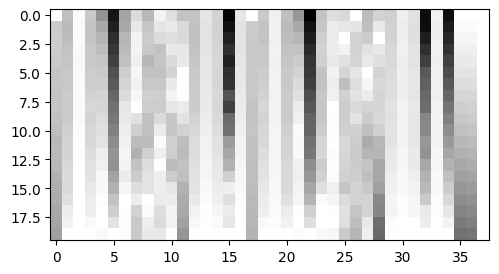

In [36]:
plt.figure(figsize=(10, 3))
all_images = np.concatenate((train_images, test_images), axis=0)
img = np.mean(all_images, axis=0)
plt.grid(False)
plt.imshow(img / img.max(axis=0), cmap='gray')

train_images = [x / img.max(axis=0) for x in train_images]
test_images = [x / img.max(axis=0) for x in test_images]
train_images, test_images = np.array(train_images), np.array(test_images)

### Models

In [51]:
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def evaluate_classifier(y_true, y_pred):
  print(f'accuracy: {accuracy_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'precision: {precision_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'recall: {recall_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'f1 score: {f1_score(np.squeeze(y_true), np.squeeze(y_pred))}')


In [60]:
model = []
param_filter = [2, 4, 8, 8]
image_shape = [5, 10, 15, 20]

for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    mod = Sequential()
    mod.add(Conv2D(32, (param_filter[i], 26), activation='relu', input_shape=(image_shape[i], 38, 1)))
    mod.add(MaxPooling2D((2, 4)))
    mod.add(Conv2D(128, (2, 2), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    mod.add(Flatten())
    mod.add(Dense(128, activation='relu'))
    mod.add(Dropout(0.4))
    mod.add(Dense(8, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(1, activation='sigmoid'))

    mod.compile(optimizer='adam', loss='binary_crossentropy', metrics=[], run_eagerly=True)

    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    history = mod.fit(train_X, train_y.astype(float), epochs=50, batch_size=256, validation_split=0.3, callbacks=[early_stop])

    model.append(mod)


Epoch 1/50
61/61 [==============================] - 5s 51ms/step - loss: 0.6998 - val_loss: 0.6930
Epoch 2/50
61/61 [==============================] - 2s 39ms/step - loss: 0.6937 - val_loss: 0.6928
Epoch 3/50
61/61 [==============================] - 3s 55ms/step - loss: 0.6932 - val_loss: 0.6927
Epoch 4/50
61/61 [==============================] - 3s 49ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 5/50
61/61 [==============================] - 3s 43ms/step - loss: 0.6931 - val_loss: 0.6926
Epoch 6/50
61/61 [==============================] - 3s 50ms/step - loss: 0.6929 - val_loss: 0.6926
Epoch 7/50
61/61 [==============================] - 2s 40ms/step - loss: 0.6930 - val_loss: 0.6926
Epoch 8/50
61/61 [==============================] - 3s 42ms/step - loss: 0.6928 - val_loss: 0.6926
Epoch 9/50
61/61 [==============================] - 2s 40ms/step - loss: 0.6929 - val_loss: 0.6926
Epoch 10/50
61/61 [==============================] - 3s 44ms/step - loss: 0.6930 - val_loss: 0.6925
Epoch 11/

297/297 [==============================] - 2s 8ms/step
accuracy: 0.6393011261972424
precision: 0.667880085653105
recall: 0.6244244244244245
f1 score: 0.6454216244180032
215/215 [==============================] - 1s 6ms/step
accuracy: 0.7329636655479352
precision: 0.6996886498726295
recall: 0.7627275532243135
f1 score: 0.7298494242692649
166/166 [==============================] - 1s 7ms/step
accuracy: 0.9087481146304676
precision: 0.9191537589724216
recall: 0.9001109877913429
f1 score: 0.9095327102803737
115/115 [==============================] - 1s 7ms/step
accuracy: 0.9553376906318083
precision: 0.9243401759530792
recall: 0.978274363749224
f1 score: 0.9505428226779252
115/115 [==============================] - 1s 7ms/step


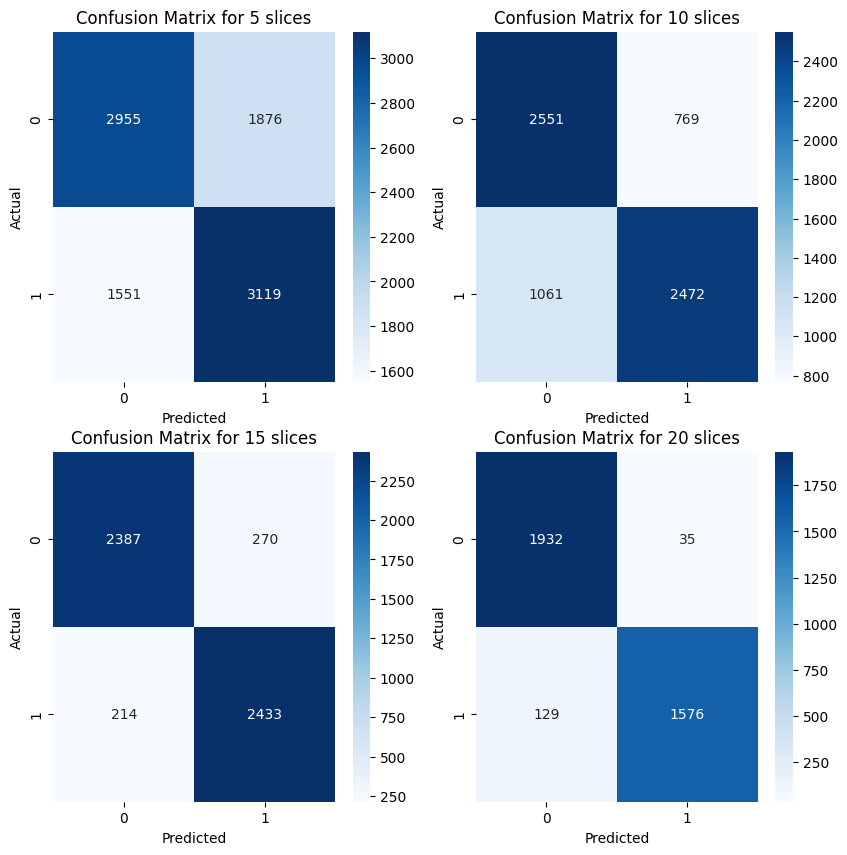

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    evaluate_classifier(np.squeeze(np.round(model[i].predict(test_X))), test_y.astype(float))
    sns.heatmap(confusion_matrix(test_y, np.round(model[i].predict(test_X))), annot=True, fmt='d', cmap='Blues', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'Confusion Matrix for {image_shape[i]} slices')
    ax[i // 2][i % 2].set_xlabel('Predicted')
    ax[i // 2][i % 2].set_ylabel('Actual')

In [58]:
mode2 = []
param_filter = [4]
image_shape = [10]

for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[1], tl[1], tei[1], tel[1]
    mod = Sequential()
    mod.add(Conv2D(32, (param_filter[i], 26), activation='relu', input_shape=(image_shape[i], 38, 1)))
    mod.add(MaxPooling2D((2, 4)))
    mod.add(Conv2D(128, (2, 2), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    mod.add(Flatten())
    mod.add(Dense(128, activation='relu'))
    mod.add(Dropout(0.4))
    mod.add(Dense(8, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(1, activation='sigmoid'))

    mod.compile(optimizer='adam', loss='binary_crossentropy', metrics=[], run_eagerly=True)

    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    history = mod.fit(train_X, train_y.astype(float), epochs=50, batch_size=256, validation_split=0.3, callbacks=[early_stop])

    mode2.append(mod)


Epoch 1/50
44/44 [==============================] - 4s 69ms/step - loss: 0.6972 - val_loss: 0.6927
Epoch 2/50
44/44 [==============================] - 3s 63ms/step - loss: 0.6936 - val_loss: 0.6919
Epoch 3/50
44/44 [==============================] - 2s 51ms/step - loss: 0.6890 - val_loss: 0.6890
Epoch 4/50
44/44 [==============================] - 3s 63ms/step - loss: 0.6843 - val_loss: 0.6799
Epoch 5/50
44/44 [==============================] - 4s 80ms/step - loss: 0.6685 - val_loss: 0.6592
Epoch 6/50
44/44 [==============================] - 3s 57ms/step - loss: 0.6420 - val_loss: 0.6444
Epoch 7/50
44/44 [==============================] - 3s 64ms/step - loss: 0.6047 - val_loss: 0.6301
Epoch 8/50
44/44 [==============================] - 3s 62ms/step - loss: 0.5663 - val_loss: 0.6026
Epoch 9/50
44/44 [==============================] - 3s 59ms/step - loss: 0.5314 - val_loss: 0.6010
Epoch 10/50
44/44 [==============================] - 3s 59ms/step - loss: 0.5213 - val_loss: 0.5784
Epoch 11/

In [59]:
train_X, train_y, test_X, test_y = ti[1], tl[1], tei[1], tel[1]
evaluate_classifier(np.squeeze(np.round(mode2[0].predict(test_X))), test_y.astype(float))

215/215 [==============================] - 2s 7ms/step
accuracy: 0.7447833065810594
precision: 0.7336541183130484
recall: 0.7623529411764706
f1 score: 0.7477282561661618
